# Cellular Automata and Dynamical System Models

In this notebook, we will illustrate how simple rules can lead to emergent behavior. Specifically, we will use Percolation as an example of how we can discover phase transitions in a grid structure. This notebook also illustrates a how simple equations are used in getting behavior from dynamical systems via the Diffusion models.

The contents of this notebook is compiled from the following references:
- https://web.mit.edu/ceder/publications/Percolation.pdf
- https://dragly.org/2013/03/25/working-with-percolation-clusters-in-python/
- https://introcs.cs.princeton.edu/java/24percolation/
- https://pypercolate.readthedocs.io/en/stable/percolation-theory.html
- https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
- https://arxiv.org/ftp/arxiv/papers/1403/1403.1011.pdf
- https://docs.idmod.org/projects/emod-hiv/en/latest/model-sir.html
- Scott E. Page, "The Model Thinker"

Organized by:
Benjur Emmanuel L. Borja

## 1. Introduction to Percolation

Percolation theory describes how global connectivity and behaviour arises from a system of a large number of random components. This often relates to physical systems such as superconductor conductivity, polymerization, and in its simplest form, a coffee maker. We say that a system is *at percolation* or is *percolating* when:
*Sufficiently many objects are connected locally such that there exists a spanning cluster that is unbounded across the entire system. Or in simple terms, there exists a continous chain of connection across our system."*

To illustrate, let's imagine a square lattice of size $N$ with random "open" and "close" components given by an occupancy probablity $p$. You can imagine this connections as conduction paths.

In [1]:
import numpy as np
from scipy.ndimage import measurements
import matplotlib.pyplot as plt

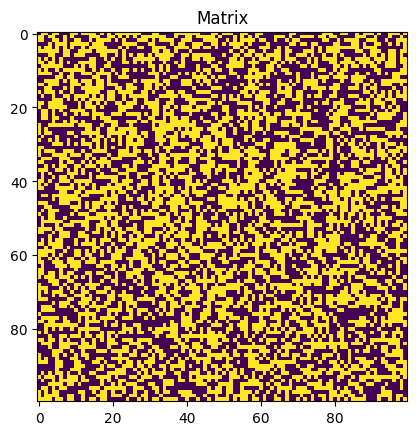

In [2]:
N = 100
p = 0.5

r = np.random.random([N,N])
z = r < p

plt.imshow(z)
plt.title("Matrix")
plt.show()

In [4]:
z

array([[False,  True,  True, ...,  True, False,  True],
       [ True,  True, False, ..., False,  True, False],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False,  True]])

Our goal is to check if this is a percolating system. To do that, we need to check if there exists a cluster that spans the entire lattice.

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/1652916601.py:1: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(z)


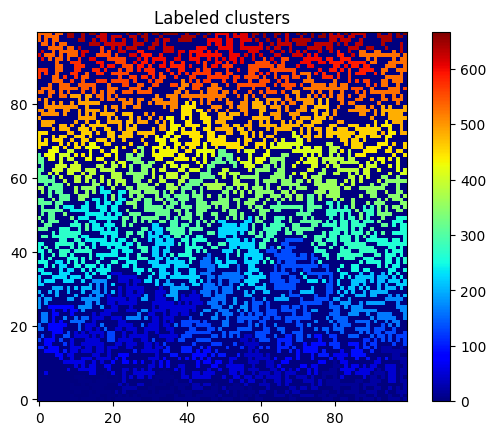

In [3]:
lw, num = measurements.label(z)
plt.imshow(lw, origin='lower', interpolation='nearest',cmap = 'jet')
plt.colorbar()
plt.title("Labeled clusters")
plt.show()

This plot shows the labels of our clusters. The clusters are not obvious since we're tagging them as we scan across the image. We can instead shuffle our labels.

In [5]:
lw

array([[  0,   1,   1, ...,  17,   0,  18],
       [  1,   1,   0, ...,   0,  23,   0],
       [  1,   1,   0, ...,  23,  23,  23],
       ...,
       [535,   0, 535, ...,   0,   0,   0],
       [535,   0, 535, ..., 656, 656,   0],
       [535, 535, 535, ..., 656,   0, 667]], dtype=int32)

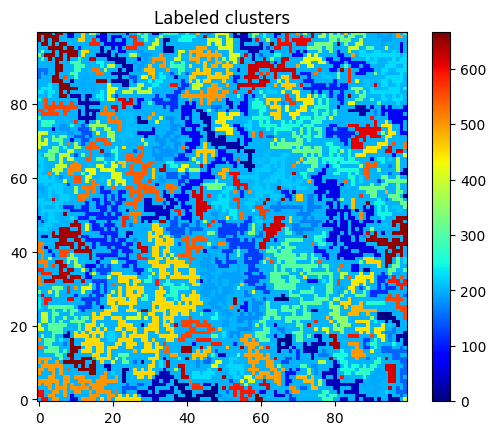

In [9]:
b = np.arange(lw.max() + 1)
np.random.shuffle(b)
shuffledLw = b[lw]
plt.imshow(shuffledLw, origin='lower', interpolation='nearest',cmap = 'jet')
plt.colorbar()
plt.title("Labeled clusters")
plt.show()

With this, we can now easily observe our clusters. Obviously, we dont see any spanning cluster. Our next step is to measure the properties of our cluster.

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/2174280305.py:1: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))


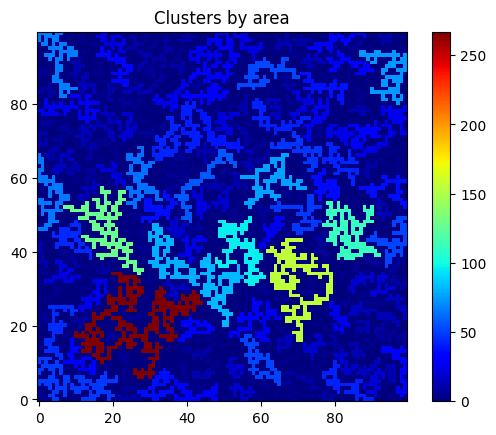

In [10]:
area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))
areaImg = area[lw]
im3 = plt.imshow(areaImg, origin='lower', interpolation='nearest',cmap='jet')
plt.colorbar()
plt.title("Clusters by area")
plt.show()

Getting the statistics of our clusters:

In [11]:
print('Number of Clusters: ',num)
print('Max Area of Clusters: ',np.max(area))

Number of Clusters:  667
Max Area of Clusters:  267.0


We can also tag our largest cluster using our areaImg.

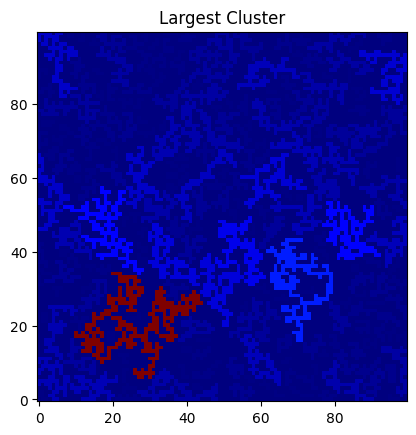

In [12]:
areaImg[areaImg == np.max(areaImg)] = 1000 #setting it to a large number to highlight
im4 = plt.imshow(areaImg, origin='lower', interpolation='nearest',cmap='jet')
plt.title("Largest Cluster")
plt.show()

**Exercise:** The next step is to determine if this cluster spans across the entire system. We'll leave that as an exercise.

Given this, we're now interested to see how our cluster dynamics would vary given varying probabilities.

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/2322196673.py:13: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(z)
/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/2322196673.py:14: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))


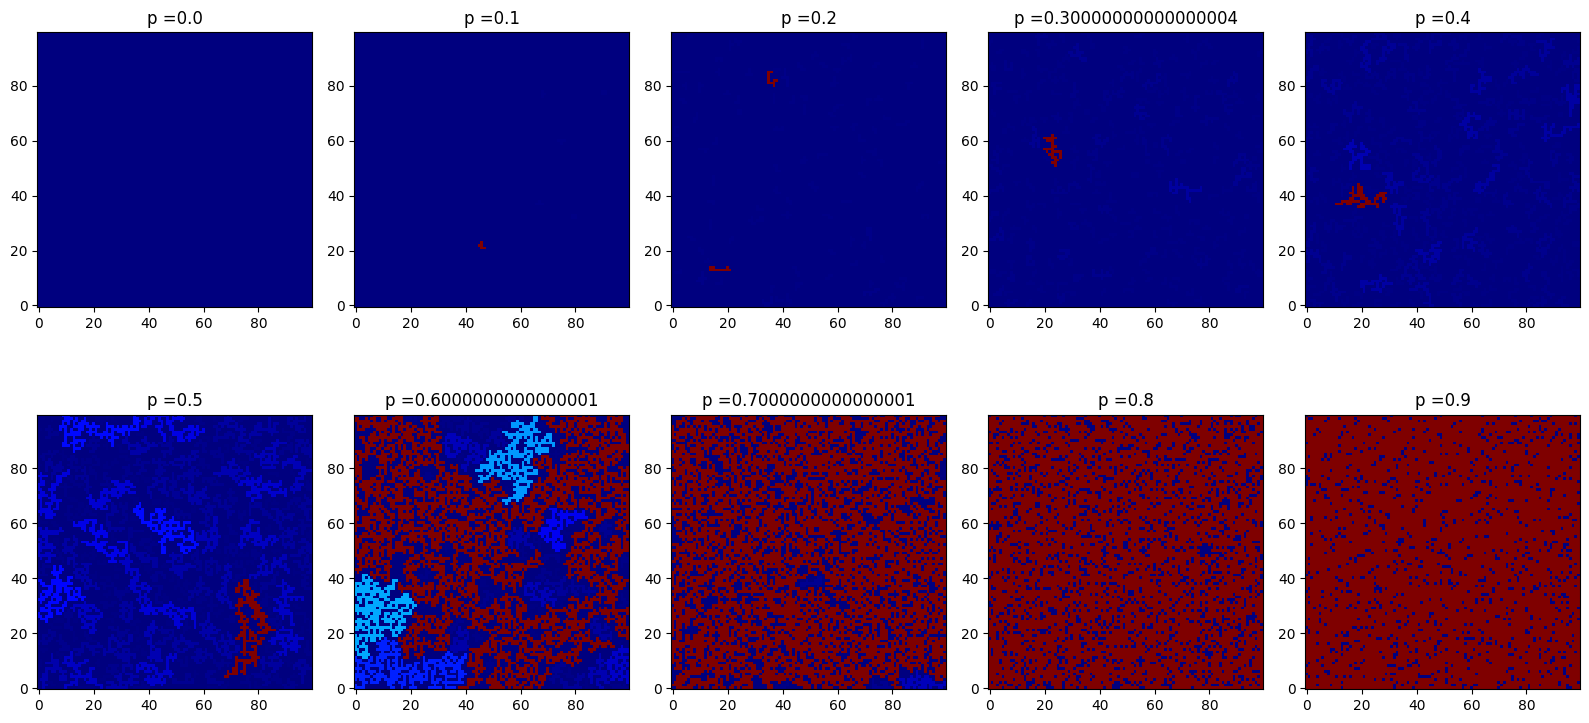

In [13]:
N = 100
p_set = np.linspace(0,0.9,10)

c_nums = []
c_maxs = []

plt.figure(figsize=[16,8])
i = 0

for p in p_set:
    r = np.random.random([N,N])
    z = r < p
    lw, num = measurements.label(z)
    area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))
    areaImg = area[lw]
    areaImg[areaImg == np.max(areaImg)]
    areaImg[areaImg == np.max(areaImg)] = 1000
    ax= plt.subplot(2,5 ,i+1)
    im = ax.imshow(areaImg, origin='lower', interpolation='nearest',cmap='jet')
    plt.title('p =' + str(p))
    c_nums += [num] 
    c_maxs += [np.max(area)]
    i+=1

plt.tight_layout()
plt.show()


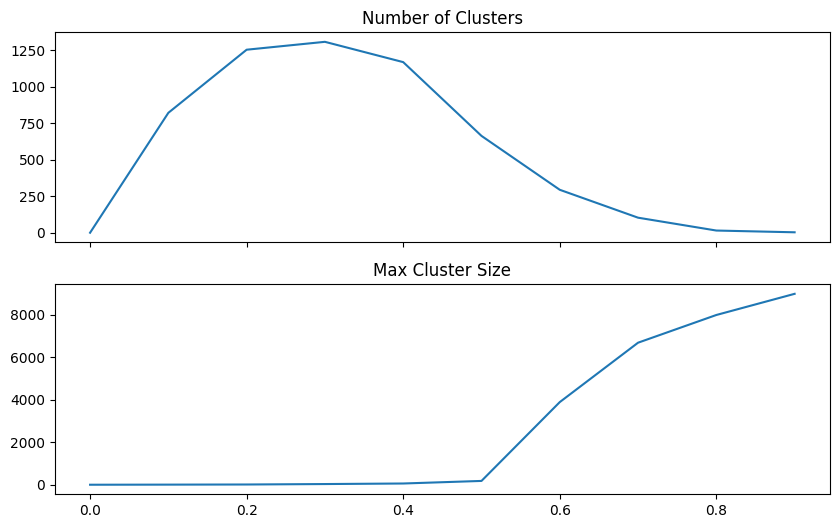

In [14]:
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(10,6))
axes[0].plot(p_set,c_nums)
axes[0].set_title('Number of Clusters')
axes[1].plot(p_set,c_maxs)
axes[1].set_title('Max Cluster Size')
plt.show()

Notice that there is an obvious shift in dynamics around 0.6 probability. Let's try to increase the resolution of our probabilities to better see the dynamics:

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/2188031007.py:11: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(z)
/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/2188031007.py:12: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))


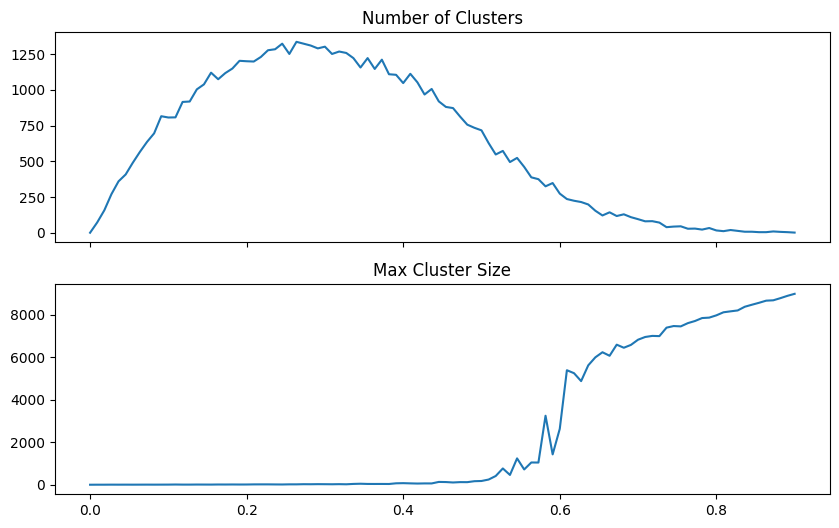

In [15]:
N = 100
p_set = np.linspace(0,0.9,100)

c_nums = []
c_maxs = []


for p in p_set:
    r = np.random.random([N,N])
    z = r < p
    lw, num = measurements.label(z)
    area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))
    c_nums += [num] 
    c_maxs += [np.max(area)]
    i+=1

fig, axes = plt.subplots(2, 1, sharex=True,figsize=(10,6))
axes[0].plot(p_set,c_nums)
axes[0].set_title('Number of Clusters')
axes[1].plot(p_set,c_maxs)
axes[1].set_title('Max Cluster Size')
plt.show()

We can now see that our maximum cluster is around 50% at around p = 0.60. This now gives us the idea that a *percolation threshold* might exist. That is, our systems dynamics would change beyond this value. This will be more obvious when we look at the probability of having a spanning cluster accross our system.

Let's try that out with a "hacky" way of determing if there is a spanning cluster across our system:

In [16]:
def percolating(img): 
    return len(np.intersect1d(img[0,:],img[-1,:]))>1

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/1942458771.py:13: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(z)
/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/1942458771.py:14: DeprecationWarning: Please import `sum` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))


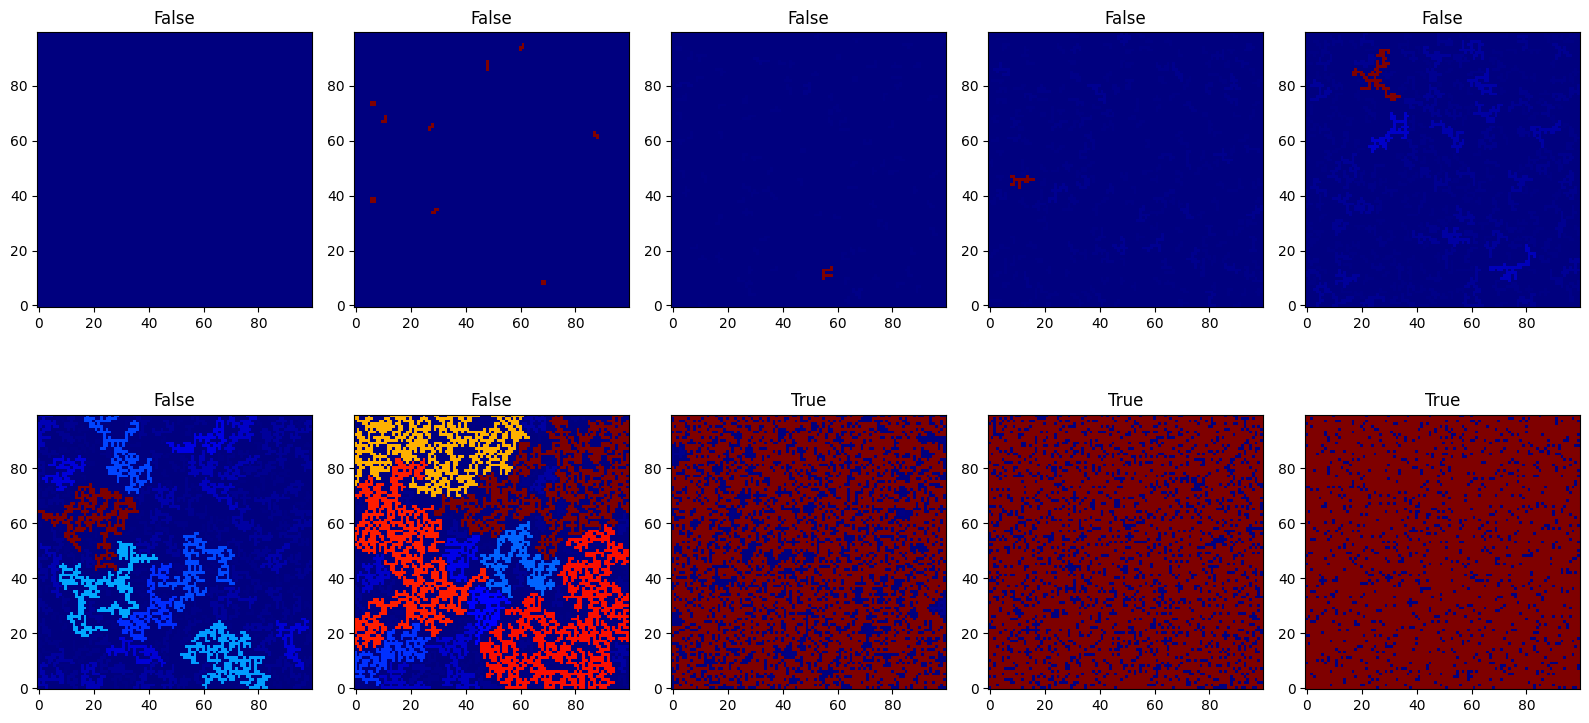

In [17]:
N = 100
p_set = np.linspace(0,0.9,10)

c_nums = []
c_maxs = []

plt.figure(figsize=[16,8])
i = 0

for p in p_set:
    r = np.random.random([N,N])
    z = r < p
    lw, num = measurements.label(z)
    area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))
    areaImg = area[lw]
    areaImg[areaImg == np.max(areaImg)]
    areaImg[areaImg == np.max(areaImg)] = 1000
    ax= plt.subplot(2,5 ,i+1)
    im = ax.imshow(areaImg, origin='lower', interpolation='nearest',cmap='jet')
    plt.title(percolating(lw))
    c_nums += [num] 
    c_maxs += [np.max(area)]
    i+=1

plt.tight_layout()
plt.show()

Let's do a Monte Carlo Simulation that would determine the probability that a spanning cluster exists given a probability $p$.

/var/folders/7w/212vn8g56fv34jl_csp2y6rw0000gn/T/ipykernel_71732/3170880049.py:11: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  lw, num = measurements.label(z)


Text(0, 0.5, 'Probability of spanning cluster $p_p$')

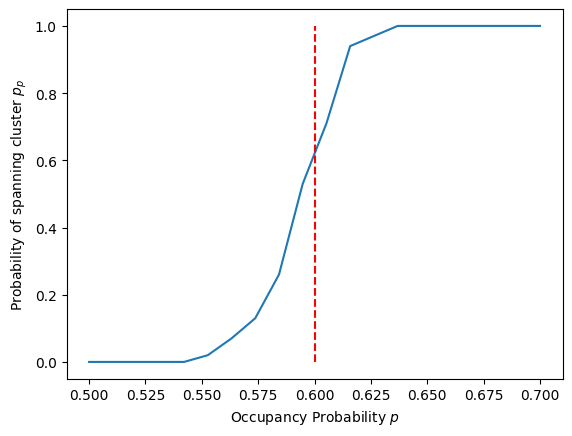

In [18]:
N = 100
p_set = np.linspace(0.5,0.7,20)

p_p = []

for p in p_set:
    p_ = []
    for i in range(0,100):
        r = np.random.random([N,N])
        z = r < p
        lw, num = measurements.label(z)
        p_ += [percolating(lw)]
    p_ = np.array(p_)
    p_p+=[float(p_.sum())/len(p_)]
 
plt.plot(p_set,p_p)
plt.plot([0.6,0.6],[0.0,1.0],'r--')
plt.xlabel("Occupancy Probability $p$")
plt.ylabel("Probability of spanning cluster $p_p$")
#fig, axes = plt.subplots(2, 1, sharex=True,figsize=(10,6))
#axes[0].plot(p_set,c_nums)
#axes[0].set_title('Number of Clusters')
#axes[1].plot(p_set,c_maxs)
#axes[1].set_title('Max Cluster Size')
#plt.show()

This is actually our *percolation threshold* $p_c$. This is where our *Phase Transition* happens. A percolation model for which $p<p_c$ is called a subcritical percolation while a model satisfying $p>p_c$ is called a supercritical percolation. the $p_c$ marks the exact point of transition between the subcritical phase $p<p_c$ and the supercritical phase $p>p_c$. Note that by definition, subcritical percolation models are necessarily devoid of infinite connected components, whereas supercritical models always contain at least one such component.

Given that our lattice is finite, we will see some variance in the actual value of $p_c$. There is a lot more things to consider given this dynamics but we can leave that to our discussion. Just to illustrate, here are the percolation thresholds for various configurations:
![percolation.png](percolation.png "Percolation Thresholds")    

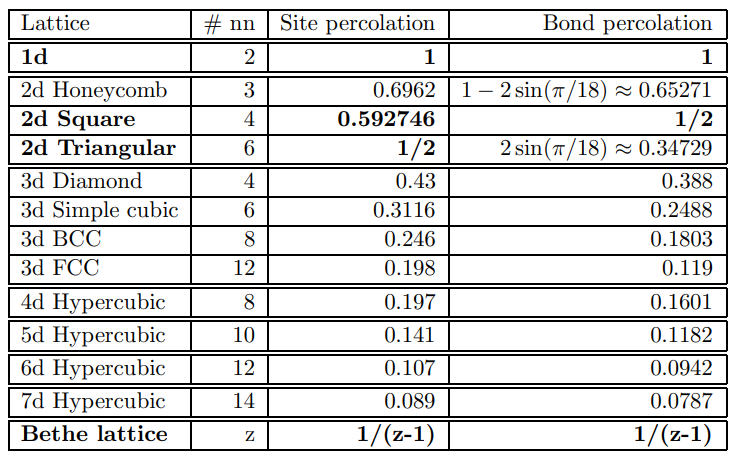

#### Things to consider:
- How does your dimensions and aspect ratio affect the percolation threshold?

## 2. Diffusion Models
In the previous section of this notebook, we discussed percolation, where we looked for the existence of spanning clusters in systems. These are often constrained to geometric structures and are focused on finding the critical percolation threshold. In a sense, we're looking for a global spread of "information" in our lattice. For this section, we will look at another form of information spreading which is **Diffusion.** Note that there are a lot of definitions for Diffusion, depending on the context that we want to look at. For our case, we're specifically interested in information spreading across a population through an agent to agent contact. 

The basis of our diffusion models is that we partition our population into *activated* and *non-activated* agents (simillar to our percolation model). You can think of this as infected or non-infected in disease modeling; or informed or uninformed in a news context. We would then model the transition of our agents between these groups and look at the dynamics across time. 

However, let's first take a look at the mathematical approach in diffusion models. Let's first define our variables for our diffusions models: the total population of our system is $N_{pop}$; the number of *informed* or *infected* at a given time $t$ is $I_t$; and the *uninformed* or *uninfected* are *susceptible* and is given by $S_t$. At any moment, $N_{pop}=I_t+S_t$.

### 2.1 The Broadcast Model
The **Broadcast Model**, as the name suggests captures the spread of information globally in our system. That is, we have a single source of information giving our agents the same probility of being informed. Imagine a television broadcast at each time step. The Broadcast Model is then given by the following equation:
\begin{equation}
I_{t+1}  =  I_{t} + P_{broad} S_{t}
\end{equation}

where $P_{broad}$ is the broadcast probability. Initially, we set $I_0 = 0$ and $S_0 = N_{pop}$.

To illustrate:

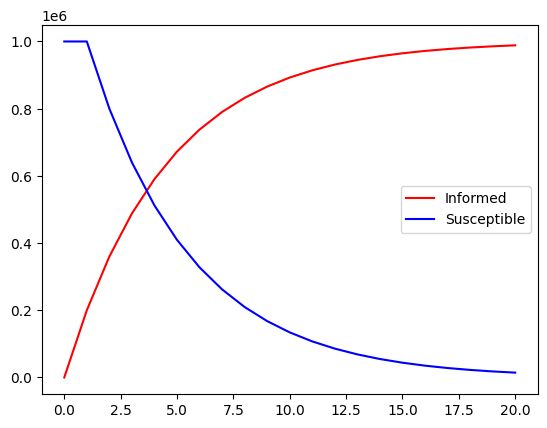

In [19]:
N_pop = 1000000
p_broad = 0.2

I = [0]
S_t = N_pop
S = [S_t]
for t in range(0,20):
    S_t = N_pop - I[t]
    S += [S_t]
    I += [I[t] + p_broad*S_t]
plt.plot(I,'r',label='Informed')
plt.plot(S,'b',label='Susceptible')
plt.legend()

For this model, everyone in our population eventually learns the information, hence plateauing at $N_{pop}$. The broadcast model works as a rough estimate for our information spreading but there are a lot of factors that the broadcast model doesn't consider. Most importantly, it doesn't take into consideration the peer-to-peer interaction of our agents.

### 2.2 The Diffusion Model
As oposed to the broadcast model, the **Diffusion Model** captures the spread of information through agent to agent interactions. It assumes that for each of the informed or infected agents *I*, there is some probablity that it will pass the disease or information to those in contact. There are a lot of factors that affects this probablity, e.g.: health, genetics, and environmental factors for disease modeling; and choice or bias for information spreading.

For the diffusion model, we are now considering two probabilities: $P_{spread}$ as the probability of transfer of information and $P_{contact}$ as the probablity of interaction between our agents.*Note the underlying assumption for the diffusion model is that we're considering **random mixing**, that is the relevant population has an equal chance of interacting*. This is a simplification of what is actually happening in the real world but it doesn't make the model useless. Let's just keep the assumption in mind as we model.

With this, the Diffusion Model is now given by the equation:

\begin{equation}
I_{t+1}  =  I_{t} + P_{diffuse} \cdot \frac{I_{t}}{N_{pop}} \cdot S_{t}
\end{equation}

where  $P_{diffuse} = P_{spread} \cdot P_{contact}$. Quick question, why is there $\frac{I_{t}}{N_{pop}}$ factor?

Let's illustrate:

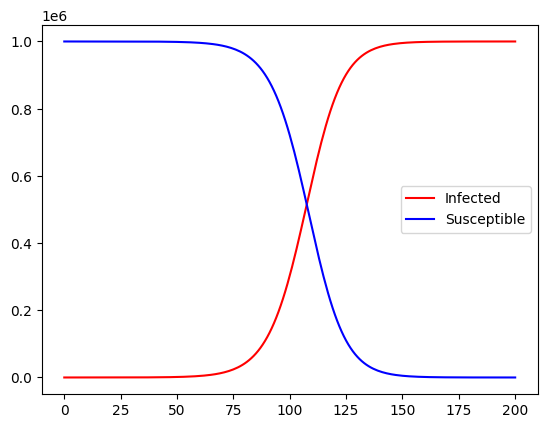

In [20]:
N_pop = 1000000

p_con = 0.2
p_spr = 0.6
p_diff = p_con*p_spr


I = [5]
S_t = N_pop
S = [S_t]
for t in range(0,200):
    S_t = N_pop - I[t]
    S += [S_t]
    I += [I[t] + p_diff*(I[t]/N_pop)*S_t]
plt.plot(I,'r',label='Infected')
plt.plot(S,'b',label='Susceptible')
plt.legend()


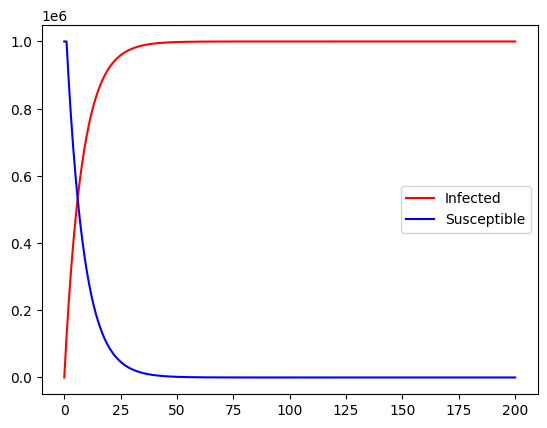

In [21]:
N_pop = 1000000

p_con = 0.2
p_spr = 0.6
p_diff = p_con*p_spr


I = [5]
S_t = N_pop
S = [S_t]
for t in range(0,200):
    S_t = N_pop - I[t]
    S += [S_t]
    I += [I[t] + p_diff*(1)*S_t]
plt.plot(I,'r',label='Infected')
plt.plot(S,'b',label='Susceptible')
plt.legend()

What do you notice with the curve? Let's try to change some parameters:

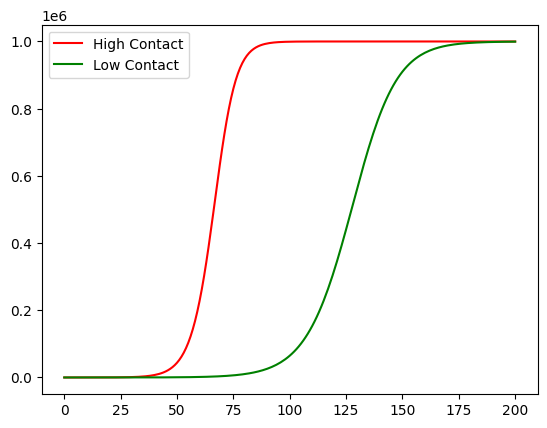

In [22]:
N_pop = 1000000

p_con = 0.4
p_spr = 0.5
p_diff = p_con*p_spr

I1 = [5]
S_t = N_pop
for t in range(0,200):
    S_t = N_pop - I1[t]
    I1 += [I1[t] + p_diff*(I1[t]/N_pop)*S_t]

N_pop = 1000000
p_con = 0.2
p_spr = 0.5
p_diff = p_con*p_spr

I2 = [5]
S_t = N_pop
for t in range(0,200):
    S_t = N_pop - I2[t]
    I2 += [I2[t] + p_diff*(I2[t]/N_pop)*S_t]

        
plt.plot(I1,'r-',label='High Contact')
plt.plot(I2,'g-',label='Low Contact')
plt.legend()

These plots are now closer to actual scenarios but are still not quite exact. For example, in epidemiology, agents gets cured eliminating the chance to spread the disease. We call these agents *recovered*. But before we move into this, let's first combine diffusion model and broadcast model into one.

### 2.3 The Bass Model
The previous two models gave us r-curves and s-curves that helps us model information spreading. Both have their own dynamics and would individually work, depending on what we're trying to model. Imagine a news report where most of the population are informed through tv broadcast while others are informed through gossip or word of mouth. For cases where there is both a global and local spread of information, we can use the **Bass Model**. This model simply combines the previous two models into one.

\begin{equation}
I_{t+1}  = I_{t} + P_{broad} S_{t} + P_{diffuse} \cdot \frac{I_{t}}{N_{pop}} \cdot S_{t}
\end{equation}

Illustrating it:

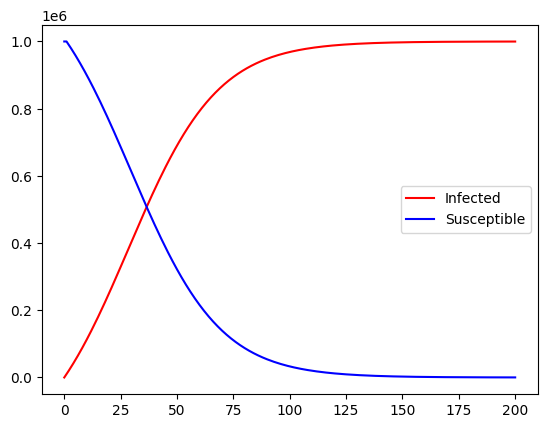

In [23]:
N_pop = 1000000

p_bro = 0.01
p_con = 0.2
p_spr = 0.2
p_diff = p_con*p_spr

I = [0]
S_t = N_pop
S = [S_t]
for t in range(0,200):
    S_t = N_pop - I[t]
    S += [S_t]
    I += [I[t]+p_bro*S_t + p_diff*(I[t]/N_pop)*S_t]
plt.plot(I,'r',label='Infected')
plt.plot(S,'b',label='Susceptible')
plt.legend()

This model can now capture the dynamics of our diffusion and broadcast models. To wrap up our discussion, let's look at contagion spreading, that is, considering the recovery of our agents from our activation.

## 3. The SIR model
For our last model, we will consider the *Susceptible-Infected-Recovered* Model or the **SIR Model**. As the name implies, we will now let our agents recover from our infection. Given this context, we'll stick with the infection paradigm as we need complex imagination to think of *"recovering from an information"*. Recovery is given by the probability $P_{recover}$. Again, we assume that this probability is universal across all of our population. The equation is now given by:
\begin{equation}
I_{t+1}  = I_{t} + P_{contact} \cdot P_{spread} \cdot \frac{I_{t}}{N_{pop}} \cdot S_{t} - P_{recover} I_{t} 
\end{equation}

Immediately, we will notice that the SIR model has the same form as our Diffusion model, with an added term for the recovery. Note that we dont have a broadcast term for this model. Also note that our population is now equal to $N_{pop}=I_t+S_t+R_t$, where $R_t$ is our recovered population. 

With this, let's try to illustrate:

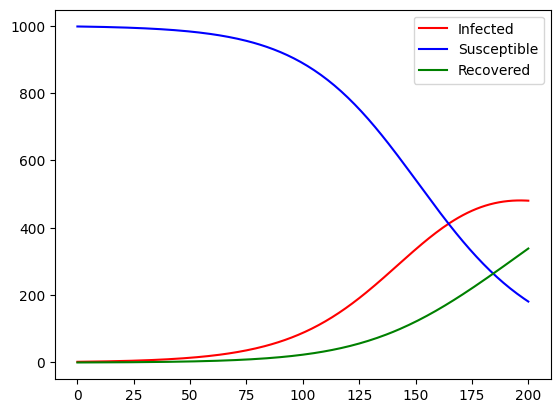

In [24]:
N_pop = 1000

p_rec = 0.01
p_con = 0.1
p_spr = 0.5

I = [2]
R = [0]
S_t = N_pop - I[0]
S = [S_t]

for t in range(0,200):
    #print(p_rec*I[t])
    del_S = - p_con*p_spr*(I[t]/N_pop)*S[t]
    del_I = p_con*p_spr*(I[t]/N_pop)*S[t] - p_rec*I[t]
    del_R = p_rec*I[t]
    
    S += [S[t]+del_S]
    I += [I[t]+del_I]
    R += [R[t]+del_R]
    
plt.plot(I,'r',label='Infected')
plt.plot(S,'b',label='Susceptible')
plt.plot(R,'g',label='Recovered')
plt.legend()

With this, we can now model the dynamics of the spread and recovery of diseases given by our Probabilities. The most critical consideration in the SIR model is the *basic reproduction number $R_o$*. This is the tipping point or the ratio between the diffusion and recovery probability of our system, given by:
\begin{equation}
R_o  = \frac{P_{contact} \cdot P_{spread}}{P_{recover}} 
\end{equation}

This number gives us an approximation of the extent of the population than can be affected by our disease. Ideally, we would want this to be low, i.e. higher rate or probablity to recover. There are a lot of factors to consider in computing the $R_o$ value, both individual and societal. For example, in absence of a vaccine, we can reduce the probability of contact between our agents, hence the quarantine procedures. With this, we have illustrated the mathematial formulations of the different diffusion process.

#### Can you imagine how you can translate this into an individual-interaction level model?
Next step would be to do actual simulations and reproduce the computed results and compare with real-world data.

### Exercise: Implement the Bak-Tang-Weisenfield Sandpile Model
Bak-Tang-Weisenfield Sandpile Model is one of the simplest Cellular Automata Model that shows self-organized criticality. The BTW Model creates a finite grid of "a pile of sand" that has an associated value that corresponds to the slope of the pile. This slope builds up as "grains of sand" (or "chips") are randomly placed onto the pile, until the slope exceeds a specific threshold value at which time that site collapses transferring sand into the adjacent sites, increasing their slope.

In The BTW Model has the following simple rule:
1. Initialize a zero-valued N X N grid. (Try N = 128)
1. **Drop** - For each iteration *t*, select a random grid and add 1 to the value
1. **Stability** - Check if the cell is stable, i.e. value of the selected random grid is greater than or equal to threshold of 4, If true:
    1. **Topple** - Redistribute the value of the cell to its neighbors (i.e. return to 0. Cells in the top, bottom, left, and right +1)
    1. Check the stability of neighbors and tople (Check if > 4 and so on)
    1. Repeat until all affected cells are stable
    1. *If the cell is at the edge, the grains **falls off** the grid and results in a net loss.* 
1. The toppling of the cell and its corresponding effect in the system is called an *Avalanche*. Count the number of cells affected by the avalanche and store for time *t*. This is called the Avalanche Size (*s*).
1. Iterate this process over large value of *t*.

#### Questions
1. Plot the time vs avalanche size. Describe the dynamics of the avalanche size. How would this plot change as you vary N?
1. Plot the histogram of avalanche sizes. What does this distribution look like? Try to change the x and y axis in the logarithm to make the plot more obvious.
1. Plot the histogram of waiting time between large avalanches (s > N). What distribution does this show?

*Hint - You should be getting a linear plot in log-log axis. This distribution was discussed in MDS. It is a characteristic of most complex systems. What are the implications of this distribution?*

In [54]:
import numpy as np
import matplotlib.pyplot as plt

N=50
grid = np.zeros((N,N))

In [46]:
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

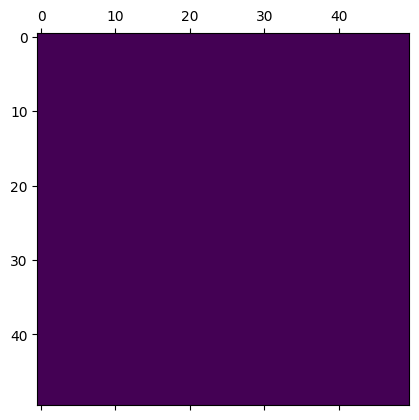

In [ ]:
N=50
grid = np.zeros((N,N))plt.matshow(grid)

In [ ]:
N=50
grid = np.zeros((N,N))
steps = 1000
thresh = 4

for t in range(steps):
    x = np.random.randint(0,N)
    y = np.random.randint(0,N)
    grid[x,y] += 1
    
    if grid[x,y] >= 4:
        
    # unstable = grid >= thresh
    

In [ ]:
def topple(x, y)


In [52]:
grid

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 2., ..., 0., 1., 1.],
       [1., 3., 1., ..., 3., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 2., 1., 0.],
       [3., 0., 2., ..., 0., 2., 1.]])

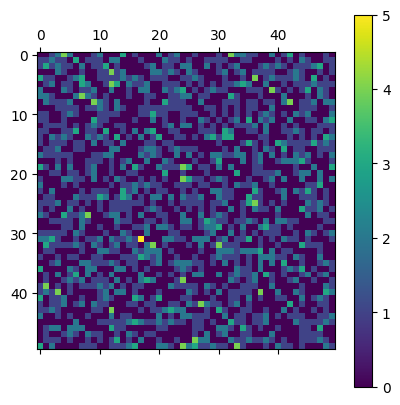

In [53]:
plt.matshow(grid)
plt.colorbar()